<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Сравнение-двух-тарифов-по-категориям-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение двух тарифов по категориям</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Продолжитеность-звонков-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Продолжитеность звонков</a></span></li><li><span><a data-toc-modified-id="Количесвто-смс-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Количесвто смс</a></span></li><li><span><a data-toc-modified-id="Количество-интернет-трафика-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Количество интернет трафика</a></span></li></ul></li><li><span><a data-toc-modified-id="Сравнение-каждой-катагеории-по-двум-тарифам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравнение каждой катагеории по двум тарифам</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Тариф-Smart-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Тариф Smart</a></span></li><li><span><a data-toc-modified-id="Тариф-Ultra-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Тариф Ultra</a></span></li><li><span><a data-toc-modified-id="Сравненение-среднего,-дисперсии-и-стандартного-отклонения-по-тарифам-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Сравненение среднего, дисперсии и стандартного отклонения по тарифам</a></span></li></ul></li></ul></li><li><span><a data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

**Цель исследования:** нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше за 2018 год и проверить две гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Описание тарифов:**

**Тариф «Смарт»**
   1. Ежемесячная плата: 550 рублей
   2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
   3. Стоимость услуг сверх тарифного пакета:
     * минута разговора: 3 рубля
     * сообщение: 3 рубля
     * 1 Гб интернет-трафика: 200 рублей
     
**Тариф «Ультра»**
   1. Ежемесячная плата: 1950 рублей
   2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   3. Стоимость услуг сверх тарифного пакета:
     * минута разговора: 1 рубль
     * сообщение: 1 рубль
     * 1 Гб интернет-трафика: 150 рублей
     
**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## 1. Обзор данных

In [1]:
# импортировал библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from sklearn import datasets

In [2]:
# создал переменную df_users и сохранил в неё файлы таблицы
df_users = pd.read_csv('/datasets/users.csv')
# создал переменную df_calls и сохранил в неё файлы таблицы
df_calls = pd.read_csv('/datasets/calls.csv')
# создал переменную df_messages и сохранил в неё файлы таблицы
df_sms = pd.read_csv('/datasets/messages.csv')
# создал переменную df_internet и сохранил в неё файлы таблицы
df_internet = pd.read_csv('/datasets/internet.csv')
# создал переменную df_tariffs и сохранил в неё файлы таблицы
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
# вывел первые 5 строк таблицы df_users
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
# посмотрел общую информацию о таблице df_users
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Согласно документации к данным:**

Таблица `users` (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `age` — возраст пользователя (годы)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `first_name ` — имя пользователя
* `last_name` — фамилия пользователя
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `tariff` — название тарифного плана

In [5]:
# вывел первые 5 строк таблицы df_calls
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
# посмотрел общую информацию о таблице df_calls
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Согласно документации к данным:**

Таблица `calls` (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [7]:
# вывел первые 5 строк таблицы df_messages
df_sms.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
# посмотрел общую информацию о таблице df_messages
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Согласно документации к данным:**

Таблица `messages` (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [9]:
# вывел первые 5 строк таблицы df_intrnet
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
# посмотрел общую информацию о таблице df_internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Согласно документации к данным:**

Таблица `internet` (информация об интернет-сессиях):
* `id` — уникальный номер сесии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [11]:
# вывел первые 5 строк таблицы df_tarifs
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
# посмотрел общую информацию о таблице df_tarifs
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Согласно документации к данным:**

Таблица `tariffs` (информация о тарифах):
* `tariffs_name` — название тарифа
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## 2. Предобработка данных

In [13]:
# вывел первые 5 строк таблицы df_users
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
# заменил пропущенные значения в столбце churn_date на 0
df_users['churn_date'] = df_users['churn_date'].fillna('Тариф действует')
# заменил строковой формат на временной в столбце reg_date
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

**Вывод  о данных**

В таблице df_users были найдены пропуски в столбце churn_date, заменил их на значение 'Тариф действует'. Поменял строковой формат в столбце reg_date на временной

In [15]:
# вывел первые 5 строк таблицы df_calls
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [16]:
# округлил столбец duration в большую сторону методом ceil из библиотеки math
df_calls['duration'] = df_calls['duration'].apply(math.ceil)
# заменил строковой формат на временной в столбце call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


**Вывод  о данных**

В таблице df_calls не обнаружено пропущенных значений, данные написаны корректно. По примечанию округлил данные в большую сторону в столбце duration и поменял строковой формат в столбце cull_date на временной

In [17]:
# вывел первые 5 строк таблицы df_sms
df_sms.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [18]:
# заменил строковой формат на временной в столбце message_date
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'])

**Вывод  о данных**

В таблице df_messges не обнаружено пропусков, данные написаны корректно. Поменял строковой формат в столбце messages_date на временной

In [19]:
# вывел первые 5 строк таблицы df_internet
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [20]:
# удалил столбец Unnamed: 0, так как является артефактом данных
df_internet.pop('Unnamed: 0')
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [21]:
# заменил строковой формат на временной в столбце session_date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

**Вывод  о данных**

В таблице df_internet не обнаружено пропусков, данные написаны корректно. Поменял строковой формат в столбце session_date на временной

In [22]:
# вывел первые 5 строк таблицы df_tariffs
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Вывод  о данных**

В таблице df_tariffs не обнаружено пропусков, данные написаны корректно

**Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя**

In [23]:
# к столбцу call_date применил метод dt.month, чтобы выделить месяц и добавил новый столбец month
df_calls['month'] = df_calls['call_date'].dt.month

In [24]:
# создал сводную таблицу по индексам столбцов user_id и month по значению duration, 
# посчитав количесвто израсходованных минут каждого пользователя и количетсво звонков по месяцам
df_calls_count_sum = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
df_calls_count_sum.head()

count      sum
              duration duration
user_id month                  
1000    5           22      159
        6           43      172
        7           47      340
        8           52      408
        9           58      466

In [25]:
# переменовал столбцы 
df_calls_count_sum.columns = ['calls', 'duration_calls']
df_calls_count_sum.reset_index().head()

,user_id,month,calls,duration_calls
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


**Количество отправленных сообщений по месяцам для каждого пользователя**

In [26]:
# к столбцу messages_date применил метод dt.month, чтобы выделить месяц и добавил новый столбец month
df_sms['month'] = df_sms['message_date'].dt.month

In [27]:
# создал сводную таблицу по индексам столбцов user_id и month по значению id, 
# посчитав количесвто сообщений каждого пользователя по месяцам
df_sms_count = df_sms.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
df_sms_count.head()

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

In [28]:
# переменовал столбец
df_sms_count.columns = ['sms']
df_sms_count.reset_index().head()

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [29]:
# к столбцу sesssion_date применил метод dt.month, чтобы выделить месяц и добавил новый столбец month
df_internet['month'] = df_internet['session_date'].dt.month

**Объем израсходованного интернет-трафика (в гигабайтов) по месяцам для каждого пользователя**

In [30]:
# создал сводную таблицу по индексам столбцов user_id и month по значению mb_used, 
# посчитав количесвто израсходованного интернет трафика по месяцам 
df_internet_sum = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
df_sms_count.reset_index().head()

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [31]:
# присоединил переменную df_internet_sum к переменной df_messages_count, методом join
df_sms_internet = df_internet_sum.join(df_sms_count)
df_sms_internet.reset_index().head()

,user_id,month,mb_used,sms
0,1000,5,2253.49,22.0
1,1000,6,23233.77,60.0
2,1000,7,14003.64,75.0
3,1000,8,14055.93,81.0
4,1000,9,14568.91,57.0


In [32]:
# присоединил переменную df_calls_count_sum к переменной df_messages_internet, методом join и параметром и how='right'
data = df_calls_count_sum.join(df_sms_internet, how='right')
data.reset_index().head()

,user_id,month,calls,duration_calls,mb_used,sms
0,1000,5,22.0,159.0,2253.49,22.0
1,1000,6,43.0,172.0,23233.77,60.0
2,1000,7,47.0,340.0,14003.64,75.0
3,1000,8,52.0,408.0,14055.93,81.0
4,1000,9,58.0,466.0,14568.91,57.0


In [33]:
# посмоторел количество пропусков
data.isna().sum()

calls              40
duration_calls     40
mb_used             0
sms               497
dtype: int64

In [34]:
# применил describe().T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
calls,3163.0,63.944989,32.666304,1.0,41.000,63.00,83.000,244.00
duration_calls,3163.0,457.803667,237.926463,0.0,291.000,448.00,593.500,1673.00
mb_used,3203.0,17266.708626,7516.356902,0.0,12526.905,16963.11,21432.175,49745.69
sms,2706.0,45.365115,35.085927,1.0,19.000,38.00,63.000,224.00


Пропуски возникли в результате того, что некоторые пользователи не пользуются звонками и собщениями, их стоит заменить на 0

In [35]:
# заменил пропущенные значения в таблице на 0
data = data.fillna(0)

In [36]:
# создал перенную data_tariff, по значениям стобцов user_id и tariff, таблицы df_users
data_tariff = df_users[['user_id','tariff']]
data_tariff.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


In [37]:
# добавил столбец с индексами 
data = data.reset_index()
# соединил талблицу data с переменной data_tariff, методом merge
data = data.merge(data_tariff, on='user_id', how='outer')
data

,user_id,month,calls,duration_calls,mb_used,sms,tariff
0,1000,5.0,22.0,159.0,2253.49,22.0,ultra
1,1000,6.0,43.0,172.0,23233.77,60.0,ultra
2,1000,7.0,47.0,340.0,14003.64,75.0,ultra
3,1000,8.0,52.0,408.0,14055.93,81.0,ultra
4,1000,9.0,58.0,466.0,14568.91,57.0,ultra
...,...,...,...,...,...,...,...
3201,1499,11.0,74.0,612.0,17963.31,59.0,smart
3202,1499,12.0,69.0,492.0,13055.58,66.0,smart
3203,1128,NaN,NaN,NaN,NaN,NaN,ultra
3204,1273,NaN,NaN,NaN,NaN,NaN,ultra


In [38]:
# посчитал количество пропусков
data.isna().sum()

user_id           0
month             3
calls             3
duration_calls    3
mb_used           3
sms               3
tariff            0
dtype: int64

In [39]:
# заменил пропуски на 0
data = data.fillna(0)

In [40]:
# заменил вещественный тип данных на целочисленный в некоторых столбцах
data['month'] = data['month'].astype('int')
data['calls'] = data['calls'].astype('int')
data['duration_calls'] = data['duration_calls'].astype('int')
data['mb_used'] = data['mb_used'].astype('int')
data['sms'] = data['sms'].astype('int')

In [41]:
# добавил новый столбец gb, поделив другой столбец mb_used на 1024
data['gb'] = data['mb_used'] / 1024
# округлил столбец gb в большую сторону методом ceil из библиотеки math
data['gb'] = data['gb'].apply(math.ceil)
data.head()

,user_id,month,calls,duration_calls,mb_used,sms,tariff,gb
0,1000,5,22,159,2253,22,ultra,3
1,1000,6,43,172,23233,60,ultra,23
2,1000,7,47,340,14003,75,ultra,14
3,1000,8,52,408,14055,81,ultra,14
4,1000,9,58,466,14568,57,ultra,15


In [42]:
# удалил столбец mb_used
data.pop('mb_used')
# удалил столбец calls
data.pop('calls')
data.head()

,user_id,month,duration_calls,sms,tariff,gb
0,1000,5,159,22,ultra,3
1,1000,6,172,60,ultra,23
2,1000,7,340,75,ultra,14
3,1000,8,408,81,ultra,14
4,1000,9,466,57,ultra,15


In [43]:
# применил describe().T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3206.0,1251.398628,144.788936,1000.0,1124.25,1251.0,1378.75,1499.0
month,3206.0,8.313163,2.913607,0.0,6.00,9.0,11.00,12.0
duration_calls,3206.0,451.663444,242.123284,0.0,285.00,443.5,589.00,1673.0
sms,3206.0,38.290081,36.193414,0.0,9.00,30.0,57.00,224.0
gb,3206.0,17.342171,7.359111,0.0,13.00,17.0,21.00,49.0


In [44]:
# округлил столбец gb в большую сторону методом ceil из библиотеки math
data = data.reindex(columns=['user_id', 'month', 'duration_calls', 'sms', 'gb', 'tariff'])
data.head()

,user_id,month,duration_calls,sms,gb,tariff
0,1000,5,159,22,3,ultra
1,1000,6,172,60,23,ultra
2,1000,7,340,75,14,ultra
3,1000,8,408,81,14,ultra
4,1000,9,466,57,15,ultra


In [45]:
# написал функцию для помесячной выручке по количеству разговора звонков (в мин) с каждого пользователя 
def group_revenue_call(row_call):
    
    tariff = row_call['tariff']
    duration_calls = row_call['duration_calls']
    minutes_included_smart = df_tariffs['minutes_included'][0]
    rub_per_minute_smart = df_tariffs['rub_per_minute'][0]
    minutes_included_ultra = df_tariffs['minutes_included'][1]
    rub_per_minute_ultra = df_tariffs['rub_per_minute'][1]
    
    if tariff == 'smart':
        if duration_calls <= minutes_included_smart:
            return 0
        return (duration_calls - minutes_included_smart) * rub_per_minute_smart
    
    if tariff == 'ultra':
        if duration_calls <= minutes_included_ultra:
            return 0
        return (duration_calls - minutes_included_ultra) * rub_per_minute_ultra
    
data['duration_calls_rev'] = data.apply(group_revenue_call, axis=1)

In [46]:
# написал функцию для помесячной выручке по количеству сообщений с каждого пользователя 
def group_revenue_sms(row_sms):
    
    tariff = row_sms['tariff']
    sms = row_sms['sms']
    messages_included_smart = df_tariffs['messages_included'][0]
    rub_per_message_smart = df_tariffs['rub_per_message'][0]
    messages_included_ultra = df_tariffs['messages_included'][1]
    rub_per_message_ultra = df_tariffs['rub_per_message'][1]
    
    if tariff == 'smart':
        if sms <= messages_included_smart:
            return 0
        return (sms - messages_included_smart) * rub_per_message_smart
    if tariff == 'ultra':
        if sms <= messages_included_ultra:
            return 0
        return (sms - messages_included_ultra) * rub_per_message_ultra
    
data['sms_rev'] = data.apply(group_revenue_sms, axis=1)

In [47]:
# написал функцию для помесячной выручке по количеству интернет трафика (в гб) с каждого пользователя
def group_revenue_gb(row_gb):
    
    tariff = row_gb['tariff']
    gb = row_gb['gb']
    mb_per_month_included_smart = 15
    rub_per_gb_smart = df_tariffs['rub_per_gb'][0]
    mb_per_month_included_ultra = 30
    rub_per_gb_ultra = df_tariffs['rub_per_gb'][1]
    
    if tariff == 'smart':
        if gb <= mb_per_month_included_smart:
            return 0
        return (gb - mb_per_month_included_smart) * rub_per_gb_smart
    
    if tariff == 'ultra':
        if gb <= mb_per_month_included_ultra:
            return 0
        return (gb - mb_per_month_included_ultra) * rub_per_gb_ultra
    
data['gb_rev'] = data.apply(group_revenue_gb, axis=1)

In [48]:
# написал функцию для общей выручки с каждого пользователя
def group_revenue_tariff(row_tariff):
    
    tariff = row_tariff['tariff']
    duration_calls_rev = row_tariff['duration_calls_rev']
    sms_rev = row_tariff['sms_rev']
    gb_rev = row_tariff['gb_rev']
    rub_monthly_fee_smart = df_tariffs['rub_monthly_fee'][0]
    rub_monthly_fee_ultra = df_tariffs['rub_monthly_fee'][1]
    
    if tariff == 'smart':
        return duration_calls_rev + sms_rev + gb_rev + rub_monthly_fee_smart
    return duration_calls_rev + sms_rev + gb_rev + rub_monthly_fee_ultra
    
data['revenue'] = data.apply(group_revenue_tariff, axis=1)

In [49]:
# удалил ненужные столбцы
data.pop('duration_calls_rev')
data.pop('sms_rev')
data.pop('gb_rev')
data.head()

,user_id,month,duration_calls,sms,gb,tariff,revenue
0,1000,5,159,22,3,ultra,1950
1,1000,6,172,60,23,ultra,1950
2,1000,7,340,75,14,ultra,1950
3,1000,8,408,81,14,ultra,1950
4,1000,9,466,57,15,ultra,1950


In [50]:
# создал таблицу только с тарифом smart
data_smart = data.query('tariff == "smart"')
# создал таблицу только с тарифом ultra
data_ultra = data.query('tariff == "ultra"')

In [51]:
# вывел таблицу data_smart
data_smart.reset_index(drop=True).head()

,user_id,month,duration_calls,sms,gb,tariff,revenue
0,1001,11,430,0,18,smart,1150
1,1001,12,414,0,14,smart,550
2,1002,6,117,4,11,smart,550
3,1002,7,214,11,18,smart,1150
4,1002,8,289,13,20,smart,1550


In [52]:
# вывел таблицу data_ultra
data_ultra.reset_index(drop=True).head()

,user_id,month,duration_calls,sms,gb,tariff,revenue
0,1000,5,159,22,3,ultra,1950
1,1000,6,172,60,23,ultra,1950
2,1000,7,340,75,14,ultra,1950
3,1000,8,408,81,14,ultra,1950
4,1000,9,466,57,15,ultra,1950


**Вывод по блоку**

В этом пункте была проделана большая работа по предобработке данных. Сначала измененил типы данных и округлил секунды в минуты. Потом посчитал категории по месяцам для каждого пользователя и создал новую таблицу с данными. После этого посчитал выручку по месяцам для каждого пользователя и разделил данные на две таблицы по тарифам. В итоге на выходе имеем таблицу данных с двумя тарифами, в которой посчитаны категории и выручка по месяцам для каждого пользователя, таблицу с тарифлм Smart и Ultra

## 3. Исследовательский анализ

### 3.1. Сравнение двух тарифов по категориям

#### 3.1.1. Продолжитеность звонков

In [53]:
# создал таблицу по месяцам и тарифам по количество звонков в минуту
data_duration_calls = data.groupby(['month', 'tariff'])['duration_calls'].sum().reset_index()

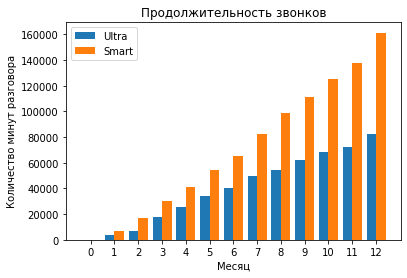

In [54]:
# посторил столбчатую диаграмму по продолжительности звонков и месяцам
X_axis = data_duration_calls['month'].unique()
Zultra = data_duration_calls[data_duration_calls['tariff'] == 'ultra']['duration_calls']
Ysmart = data_duration_calls[data_duration_calls['tariff'] == 'smart']['duration_calls']
 
plt.bar(X_axis - 0.2, Zultra, 0.4, label = 'Ultra')
plt.bar(X_axis + 0.2, Ysmart, 0.4, label = 'Smart')
 
plt.xticks(X_axis)
plt.xlabel('Месяц')
plt.ylabel('Количество минут разговора')
plt.title('Продолжительность звонков')
plt.legend();
plt.show();

По гистограмме видно, что с каждым месяцем количество звонков в минуту увеличивается по каждому тарифу. Связано это с количеством самих звонков, c каждым месяцем их становится всё больше

In [55]:
# создал таблицу по месяцам и тарифам по среднему количеству звонков в минуту
data_duration_calls = data.groupby(['month', 'tariff'])['duration_calls'].sum().reset_index() 
data_calls_user_id = data.groupby(['month', 'tariff'])['user_id'].count().reset_index() 
data_calls_mean = data_calls_user_id.merge(data_duration_calls, on=['month', 'tariff'])
data_calls_mean['duration_calls_mean'] = data_calls_mean['duration_calls'] / data_calls_user_id['user_id']
data_calls_mean['duration_calls_mean'] = data_calls_mean['duration_calls_mean'].round()
data_calls_mean['duration_calls_mean'] = data_calls_mean['duration_calls_mean'].astype('int')

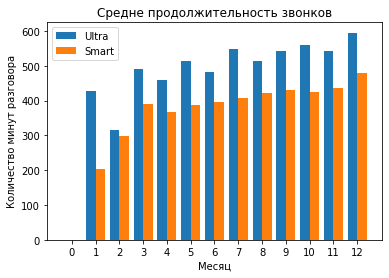

In [56]:
# посторил столбчатую диаграмму по средней продолжительности звонков и месяцам
X_axis = data_calls_mean['month'].unique()
Zultra = data_calls_mean[data_calls_mean['tariff'] == 'ultra']['duration_calls_mean']
Ysmart = data_calls_mean[data_calls_mean['tariff'] == 'smart']['duration_calls_mean']
 
plt.bar(X_axis - 0.2, Zultra, 0.4, label = 'Ultra')
plt.bar(X_axis + 0.2, Ysmart, 0.4, label = 'Smart')
 
plt.xticks(X_axis)
plt.xlabel('Месяц')
plt.ylabel('Количество минут разговора')
plt.title('Средне продолжительность звонков')
plt.legend()
plt.show();

По гистограмме видно, средняя продолжительность звонков отличается от общей продолжительности. В тарифе Ultra средняя продолжительность по месяцам больше, чем в тарифе Smart. В большей степени это связано c количеством минут, так как в тарифе Smart включено 500 минут, а в Ultra 3000 минут разговора и пользователи тарифа Smart не хотят превышать этот порог

#### 3.1.2. Количесвто смс

In [57]:
# создал таблицу по месяцам и тарифам по количество сообщений
data_sms = data.groupby(['month', 'tariff'])['sms'].sum().reset_index() 

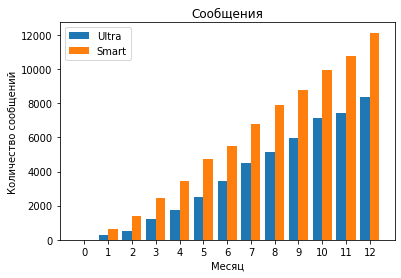

In [58]:
# посторил столбчатую диаграмму по количеству в среднем сообщений и месяцам
X_axis = data_sms['month'].unique()
Zultra = data_sms[data_sms['tariff'] == 'ultra']['sms']
Ysmart = data_sms[data_sms['tariff'] == 'smart']['sms']
 

plt.bar(X_axis - 0.2, Zultra, 0.4, label = 'Ultra')
plt.bar(X_axis + 0.2, Ysmart, 0.4, label = 'Smart')
 
plt.xticks(X_axis)
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')
plt.title('Сообщения')
plt.legend();

По гистограмме видно, что с каждым месяцем количество сообщений увеличивается по каждому тарифу. Связано это с количеством самих сообщений, c каждым месяцем их становится всё больше

In [59]:
# создал таблицу по месяцам и тарифам по среденму количеству сообщений
data_sms = data.groupby(['month', 'tariff'])['sms'].sum().reset_index() # число 
data_sms_user_id = data.groupby(['month', 'tariff'])['user_id'].count().reset_index() # число 
data_sms_mean = data_sms_user_id.merge(data_sms, on=['month', 'tariff'])
data_sms_mean['sms_mean'] = data_sms_mean['sms'] / data_sms_user_id['user_id']
data_sms_mean['sms_mean'] = data_sms_mean['sms_mean'].round()
data_sms_mean['sms_mean'] = data_sms_mean['sms_mean'].astype('int')

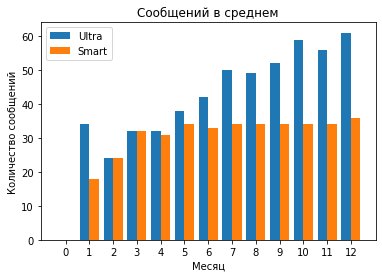

In [60]:
# посторил столбчатую диаграмму по среднему количеству сообщений и месяцам
X_axis = data_sms_mean['month'].unique()
Zultra = data_sms_mean[data_sms_mean['tariff'] == 'ultra']['sms_mean']
Ysmart = data_sms_mean[data_sms_mean['tariff'] == 'smart']['sms_mean']
 

plt.bar(X_axis - 0.2, Zultra, 0.4, label = 'Ultra')
plt.bar(X_axis + 0.2, Ysmart, 0.4, label = 'Smart')
 
plt.xticks(X_axis)
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')
plt.title('Сообщений в среднем')
plt.legend();

По этой гистограмме видно, что она тоже отличается как и гистогрмма по продолжительности звонков. Но здесь ситуация немного другая, в некоторых местах количество в среднем смс одинакова в двух тарифов. Также наблюдаем, что в тарифе Smart имеем очень близкое среднее по всем месяцем, кроме 1 и 2 месяца. Ещё можно отметить низкое количество смс у двух тарифов и можно сделать вывод, что комнания Мегалайн имеет маленькую выручку среди этой категории

#### 3.1.3. Количество интернет трафика

In [61]:
# создал таблицу по месяцам и тарифам по интернет трафику
data_gb = data.groupby(['month', 'tariff'])['gb'].sum().reset_index() 

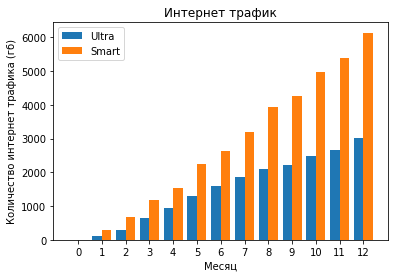

In [62]:
# посторил столбчатую диаграмму по интернет трафику и месяцам
X_axis = data_gb['month'].unique()
Zultra = data_gb[data_gb['tariff'] == 'ultra']['gb']
Ysmart = data_gb[data_gb['tariff'] == 'smart']['gb']
 

plt.bar(X_axis - 0.2, Zultra, 0.4, label = 'Ultra')
plt.bar(X_axis + 0.2, Ysmart, 0.4, label = 'Smart')
 
plt.xticks(X_axis)
plt.xlabel('Месяц')
plt.ylabel('Количество интернет трафика (гб)')
plt.title('Интернет трафик')
plt.legend();

По гистограмме видно, что с каждым месяцем интернет трафик увеличивается по каждому тарифу. Связано это с исплользованием интернет трафика, c каждым месяцем их становится всё больше

In [63]:
# создал таблицу по месяцам и тарифам по среднему интернет трафику
data_gb = data.groupby(['month', 'tariff'])['gb'].sum().reset_index() # число 
data_gb_user_id = data.groupby(['month', 'tariff'])['user_id'].count().reset_index() # число 
data_gb_mean = data_gb_user_id.merge(data_gb, on=['month', 'tariff'])
data_gb_mean['gb_mean'] = data_gb_mean['gb'] / data_gb_user_id['user_id']
data_gb_mean['gb_mean'] = data_gb_mean['gb_mean'].round()
data_gb_mean['gb_mean'] = data_gb_mean['gb_mean'].astype('int')

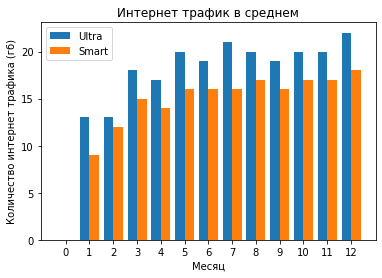

In [64]:
# посторил столбчатую диаграмму по среднему интернет трафику и месяцам
X_axis = data_gb_mean['month'].unique()
Zultra = data_gb_mean[data_gb_mean['tariff'] == 'ultra']['gb_mean']
Ysmart = data_gb_mean[data_gb_mean['tariff'] == 'smart']['gb_mean']
 

plt.bar(X_axis - 0.2, Zultra, 0.4, label = 'Ultra')
plt.bar(X_axis + 0.2, Ysmart, 0.4, label = 'Smart')
 
plt.xticks(X_axis)
plt.xlabel('Месяц')
plt.ylabel('Количество интернет трафика (гб)')
plt.title('Интернет трафик в среднем')
plt.legend()
plt.show();

По этой гистограмме видно, что также имеем отличие от общего количества как и в других гистограммах. Но наблюдается в тарифе Smart превышение включённого интернет трафика почти во всех месяцах, это значит, что по этой категории компания будет иметь хорошую выручку за счёт услуг сверх тарифного пакета. В тарифе Ultra также наблюдается превышение включённого интернет трафика, но в меньшей степени

**Вывод**

Мы сравнили 3 категории по тарифу между собой и можно сделать следующее выводы:

* во всех 3 категоряих с каждым месяцем по возрастанию увеличивается количество значений каждой категории и в тарифе Smart всегда больше этих значений, чем в Ultra


* а в среднем значение каждой категории наоборот, больше количество значений в тарифе Ultra, чем в Smart


* компания Мегалайн имеет большую выручку среди интернет трафика по тарифу Smart, можно сделать вывод, что пользователям этого тарифа не хватает 15 гб интернета и в среднем им хватает 20 гб

### 3.2 Сравнение каждой катагеории по двум тарифам

#### 3.2.1.Тариф Smart

In [65]:
# применил метод describe().T
data_smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.472858,146.082168,1001.0,1121.0,1239.0,1376.0,1499.0
month,2229.0,8.343203,2.925653,0.0,6.0,9.0,11.0,12.0
duration_calls,2229.0,417.912517,190.360058,0.0,282.0,422.0,545.0,1435.0
sms,2229.0,33.383580,28.228398,0.0,10.0,28.0,51.0,143.0
gb,2229.0,16.328847,5.747061,0.0,13.0,17.0,20.0,38.0
revenue,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0


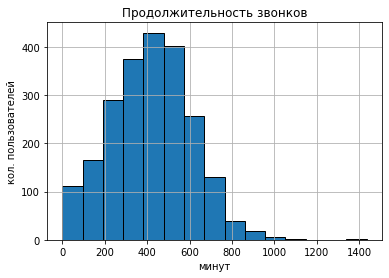

In [66]:
# построил гистограмму по продолжительности звнонков для пользователей тарифа smart
data_smart['duration_calls'].hist(bins=15, edgecolor='black');
plt.title('Продолжительность звонков');
plt.ylabel('кол. пользователей');
plt.xlabel('минут');

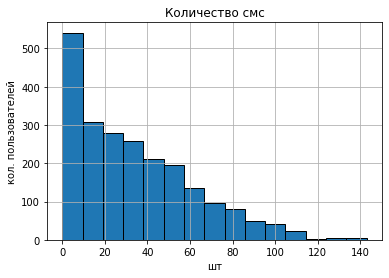

In [67]:
# построил гистограмму по кол. смс для пользователей тарифа smart
data_smart['sms'].hist(bins=15, edgecolor='black');
plt.title('Количество смс');
plt.ylabel('кол. пользователей');
plt.xlabel('шт');

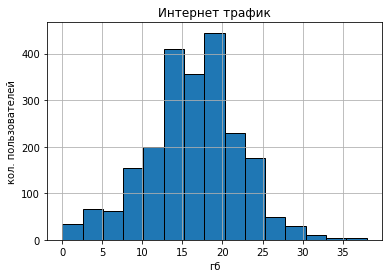

In [68]:
# построил гистограмму по продолжительности интернет трафика для пользователей тарифа smart
data_smart['gb'].hist(bins=15, edgecolor='black');
plt.title('Интернет трафик');
plt.ylabel('кол. пользователей');
plt.xlabel('гб');

**Вывод:**

По данным гистограммам можно сказать, что:
* продолжительность звонков находится в диапозоне от 300 до 550 минут, но есть и те кто пользуется больше 600 минут, а это превышает включённый тариф


* сообшениями в большей частности почти не пользуются, но есть и те кто превышают тарифный лимит


* большинство интернет трафиком пользуются в диапозоне от 12 до 20 гб и это подтверждает мою вышесказанную гипотезу

In [69]:
# посчитаны статистические значения для продолжительности звонков тарифа smart
smart_calls_mean = data_smart['duration_calls'].mean()
smart_calls_var = data_smart['duration_calls'].var()
smart_calls_std = np.sqrt(smart_calls_var)

In [70]:
# выведены статистические значения для продолжительности звонков тарифа smart
print(f'Средняя продолжительность звонков по тарифу Smart: {round(smart_calls_mean)} минут')
print(f'Дисперсия продолжительности звонков по тарифу Smart: {round(smart_calls_var)} минут')
print(f'Стандартное отклонение продолжительности звонков по тарифу Smart: {round(smart_calls_std)} минут')

Средняя продолжительность звонков по тарифу Smart: 418 минут
Дисперсия продолжительности звонков по тарифу Smart: 36237 минут
Стандартное отклонение продолжительности звонков по тарифу Smart: 190 минут


Посчитал среднее, дисперсию и стандартное отклонение для продолжительности звонков по тарифу Smart

In [71]:
# посчитаны статистические значения для кол. смс тарифа smart
smart_sms_mean = data_smart['sms'].mean()
smart_sms_var = data_smart['sms'].var()
smart_sms_std = np.sqrt(smart_sms_var)

In [72]:
# выведены статистические значения для кол. смс тарифа smart
print(f'Среднее количество смс по тарифу Smart: {round(smart_sms_mean)}')
print(f'Дисперсия количества смс по тарифу Smart: {round(smart_sms_var)}')
print(f'Стандартное отклонение количества смс звонков по тарифу Smart: {round(smart_sms_std)}')

Среднее количество смс по тарифу Smart: 33
Дисперсия количества смс по тарифу Smart: 797
Стандартное отклонение количества смс звонков по тарифу Smart: 28


Посчитал среднее, дисперсию и стандартное отклонение для количества смс по тарифу Smart.

In [73]:
# посчитаны статистические значения для интернет трафика тарифа smart
smart_gb_mean = data_smart['gb'].mean()
smart_gb_var = data_smart['gb'].var()
smart_gb_std = np.sqrt(smart_gb_var)

In [74]:
# выведены статистические значения для интернет трафика тарифа smart
print(f'Среднее интернет трафика по тарифу Smart: {round(smart_gb_mean)} гб')
print(f'Дисперсия интернет трафика по тарифу Smart: {round(smart_gb_var)} гб')
print(f'Стандартное отклонение интернет трафика звонков по тарифу Smart: {round(smart_gb_std)} гб')

Среднее интернет трафика по тарифу Smart: 16 гб
Дисперсия интернет трафика по тарифу Smart: 33 гб
Стандартное отклонение интернет трафика звонков по тарифу Smart: 6 гб


Посчитал среднее, дисперсию и стандартное отклонение для интернет трафика по тарифу Smart

#### 3.2.2. Тариф Ultra

In [75]:
# применил метод describe().T
data_ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,977.0,1262.636643,141.225984,1000.0,1143.0,1277.0,1381.0,1495.0
month,977.0,8.244626,2.886255,0.0,6.0,9.0,11.0,12.0
duration_calls,977.0,528.665302,318.199596,0.0,291.0,520.0,752.0,1673.0
sms,977.0,49.484135,47.981618,0.0,6.0,38.0,79.0,224.0
gb,977.0,19.654043,9.733807,0.0,12.0,19.0,27.0,49.0
revenue,977.0,2071.136131,377.567765,1950.0,1950.0,1950.0,1950.0,4800.0


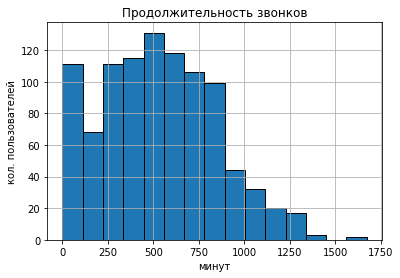

In [76]:
# построил гистограмму по продолжительности звнонков для пользователей тарифа ultra
data_ultra['duration_calls'].hist(bins=15, edgecolor='black');
plt.title('Продолжительность звонков');
plt.ylabel('кол. пользователей');
plt.xlabel('минут');

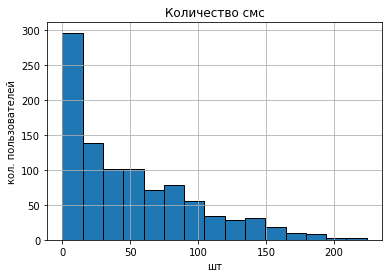

In [77]:
# построил гистограмму по кол. смс для пользователей тарифа ultra
data_ultra['sms'].hist(bins=15, edgecolor='black');
plt.title('Количество смс');
plt.ylabel('кол. пользователей');
plt.xlabel('шт');

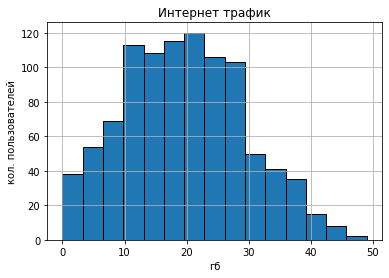

In [78]:
# построил гистограмму по продолжительности интернет трафика для пользователей тарифа ultra
data_ultra['gb'].hist(bins=15, edgecolor='black');
plt.title('Интернет трафик');
plt.ylabel('кол. пользователей');
plt.xlabel('гб');

**Вывод:**

По данным гистограммам можно сказать, что:
*  основная продолжительность звонков находится в диапозоне от 350 до 750 минут и никто бесплатный лимим не превышает


* сообшениями в большей частности почти не пользуются и нет никого кто превышает бесплатный лимит


* в большей степени интернет трафиком пользуются в диапозоне от 10 до 29 гб, но есть и те кто превышает бесплатный лимит

In [79]:
# посчитаны статистические значения для продолжительности звонков тарифа ultra
ultra_calls_mean = data_ultra['duration_calls'].mean()
ultra_calls_var = data_ultra['duration_calls'].var()
ultra_calls_std = np.sqrt(ultra_calls_var)

In [80]:
# выведены статистические значения для продолжительности звонков тарифа ultra
print(f'Средняя продолжительность звонков по тарифу Ultra: {round(ultra_calls_mean)} минут')
print(f'Дисперсия продолжительности звонков по тарифу Ultra: {round(ultra_calls_var)} минут')
print(f'Стандартное отклонение продолжительности звонков по тарифу Ultra: {round(ultra_calls_std)} минут')

Средняя продолжительность звонков по тарифу Ultra: 529 минут
Дисперсия продолжительности звонков по тарифу Ultra: 101251 минут
Стандартное отклонение продолжительности звонков по тарифу Ultra: 318 минут


Посчитал среднее, дисперсию и стандартное отклонение для продолжительности звонков по тарифу Ultra.

In [81]:
# посчитаны статистические значения для кол. смс тарифа ultra
ultra_sms_mean = data_ultra['sms'].mean()
ultra_sms_var = data_ultra['sms'].var()
ultra_sms_std = np.sqrt(ultra_sms_var)

In [82]:
# выведены статистические значения для кол. смс тарифа ultra
print(f'Среднее количество смс по тарифу Ultra: {round(ultra_sms_mean)}')
print(f'Дисперсия количества смс по тарифу Ultra: {round(ultra_sms_var)}')
print(f'Стандартное отклонение количества смс звонков по тарифу Ultra: {round(ultra_sms_std)}')

Среднее количество смс по тарифу Ultra: 49
Дисперсия количества смс по тарифу Ultra: 2302
Стандартное отклонение количества смс звонков по тарифу Ultra: 48


Посчитал среднее, дисперсию и стандартное отклонение для количества смс по тарифу Ultra.

In [83]:
# посчитаны статистические значения для интернет трафика тарифа ultra
ultra_gb_mean = data_ultra['gb'].mean()
ultra_gb_var = data_ultra['gb'].var()
ultra_gb_std = np.sqrt(ultra_gb_var)

In [84]:
# выведены статистические значения для интернет трафика тарифа ultra
print(f'Среднее интернет трафика по тарифу Ultra: {round(ultra_gb_mean)} гб')
print(f'Дисперсия интернет трафика по тарифу Ultra: {round(ultra_gb_var)} гб')
print(f'Стандартное отклонение интернет трафика звонков по тарифу Ultra: {round(ultra_gb_std)} гб')

Среднее интернет трафика по тарифу Ultra: 20 гб
Дисперсия интернет трафика по тарифу Ultra: 95 гб
Стандартное отклонение интернет трафика звонков по тарифу Ultra: 10 гб


Посчитал среднее, дисперсию и стандартное отклонение для инетрнет трафика по тарифу Ultra.

#### 3.2.3. Сравненение среднего, дисперсии и стандартного отклонения по тарифам

**Сравнение продолжительности звонков**

In [85]:
if smart_calls_mean > ultra_calls_mean:
    print('Среднее продолжительность звонков по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Среднее продолжительность звонков по тарифу Ultra больше, чем у тарифа Smart')

Среднее продолжительность звонков по тарифу Ultra больше, чем у тарифа Smart


In [86]:
if smart_calls_var > ultra_calls_var:
    print('Дисперсия продолжительности звонков по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Дисперсия продолжительности звонков по тарифу Ultra больше, чем у тарифа Smart')

Дисперсия продолжительности звонков по тарифу Ultra больше, чем у тарифа Smart


In [87]:
if smart_calls_std > ultra_calls_std:
    print('Стандартное отклонение продолжительности звонков по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Стандартное отклонение продолжительности звонков по тарифу Ultra больше, чем у тарифа Smart')

Стандартное отклонение продолжительности звонков по тарифу Ultra больше, чем у тарифа Smart


**Сравнение количество смс**

In [88]:
if smart_sms_mean > ultra_sms_mean:
    print('Среднее количество смс по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Среднее количество смс по тарифу Ultra больше, чем у тарифа Smart')

Среднее количество смс по тарифу Ultra больше, чем у тарифа Smart


In [89]:
if smart_sms_var > ultra_sms_var:
    print('Дисперсия количества смс по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Дисперсия количества смс по тарифу Ultra больше, чем у тарифа Smart')

Дисперсия количества смс по тарифу Ultra больше, чем у тарифа Smart


In [90]:
if smart_sms_std > ultra_sms_std:
    print('Стандартное отклонение количества смс по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Стандартное отклонение количества смс по тарифу Ultra больше, чем у тарифа Smart')

Стандартное отклонение количества смс по тарифу Ultra больше, чем у тарифа Smart


**Сравнение интернет трафика**

In [91]:
if smart_gb_mean > ultra_gb_mean:
    print('Среднее интернет трафика по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Среднее интернет трафика по тарифу Ultra больше, чем у тарифа Smart')

Среднее интернет трафика по тарифу Ultra больше, чем у тарифа Smart


In [92]:
if smart_gb_var > ultra_gb_var:
    print('Дисперсия интернет трафика по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Дисперсия интернет трафика по тарифу Ultra больше, чем у тарифа Smart')

Дисперсия интернет трафика по тарифу Ultra больше, чем у тарифа Smart


In [93]:
if smart_gb_std > ultra_gb_std:
    print('Стандартное интернет трафика смс по тарифу Smart больше, чем у тарифа Ultra')
else:
    print('Стандартное интернет трафика смс по тарифу Ultra больше, чем у тарифа Smart')

Стандартное интернет трафика смс по тарифу Ultra больше, чем у тарифа Smart


**Вывод**

Среднее, дисперсия и стандартное отклонение по всем категориям больше у тарифа Ultra, чем у тарифа Smart

**Вывод по блоку**

В большей степени отличается интернет трафик по тарифам. По среднему значению тарифу Smart видно, что пользователи часто доплачивают за интернет и им не хватает 15 гб, которые прописаны в бесплатном тарифе. По тарифу Ultra немного другая ситуация, среднее значение не превышает бесплатный лимит и соответственно меньше пользователей доплачивают за сверх тариф

По продолжительности звонков и количество смс в тарифе Ultra ни один из пользователей не превышает бесплатный трафик, это связано с большим пакетом услуг. Если сравнить эти категории с тарифом Smart, то включённые минуты разговора тарифа Ultra в 6 раз больше, чем Smart, а по включённым сообщениям целых в 20 раз и это очень существенно. В тарифе Smart есть те пользователи, которые превышают продолжительность звонков и количество смс. В большей степени это связано с продолжительностью звонков, абонентам не хватает 500 минут разговора в месяц и они доплачивают сверх тариф. По количеству смс ситуация немного другая, большинство пользователей вовсе не пользуется этой услугой, но есть и те кто превышают бесплатный трафик

## 4. Проверка гипотез

- **Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не одинаковые


- **Альтеративная гипотеза:**  средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [94]:
# посчитана общая и средняя выручка для тарифа smart
data_smart_revenue_sum = data_smart['revenue'].sum()
data_smart_revenue_mean = data_smart['revenue'].mean()

In [95]:
# выведена общая и средняя выручка для тарифа smart
print(f'Общая выручка по тарифу Smart: {data_smart_revenue_sum} млн')
print(f'Средння выручка по тарифу Smart: {round(data_smart_revenue_mean)}')

Общая выручка по тарифу Smart: 2875351 млн
Средння выручка по тарифу Smart: 1290


In [96]:
# посчитана общая и средняя выручка для тарифа ultra
data_ultra_revenue_sum = data_ultra['revenue'].sum()
data_ultra_revenue_mean = data_ultra['revenue'].mean()

In [97]:
# выведена общая и средняя выручка для тарифа ultra
print(f'Общая выручка по тарифу Ultra: {data_ultra_revenue_sum} млн')
print(f'Средння выручка по тарифу Ultra: {round(data_ultra_revenue_mean)}')

Общая выручка по тарифу Ultra: 2023500 млн
Средння выручка по тарифу Ultra: 2071


Посчитал общую и среднюю выручку по каждому тарифу

In [98]:
# проверка первой гипотезы
data_smart_revenue = data_smart['revenue']
data_ultra_revenue = data_ultra['revenue']

alpha = .05

results = st.ttest_ind(
    data_smart_revenue,
    data_ultra_revenue,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.944516327936837e-249
Отвергаем нулевую гипотезу


**Вывод**

Перваую гипотезу нет оснований отвергнуть, cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- **Нулевая гипотеза:** средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов


- **Альтеративная гипотеза:** средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [99]:
# созданы две таблицы data_moscow и data_not_moscow
df_city = df_users[['user_id', 'city']]
data_city = data.merge(df_city, on='user_id')
data_moscow = data_city.query('city == "Москва"')
data_not_moscow = data_city.query('city != "Москва"')

Создал таблицы для пользователей из Москвы и для других городов, кроме Москвы

In [100]:
# проверка второй гипотезы
data_moscow_revenue = data_moscow['revenue']
data_not_moscow_revenue = data_not_moscow['revenue']

alpha = .05

results = st.ttest_ind(
    data_moscow_revenue,
    data_not_moscow_revenue,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.501381587828988
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Вторую гипотезу есть основания отвергнуть, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

## 5. Общий вывод

На анализе всех данных и полученных промежуточных выводах, сказать какой тариф лучше за 2018 можно, но смотря под каким углом посмотреть

Если смотреть на общую выручку по пользователем, то тариф Smart выгоднее, чем тариф Ultra. А вот если смотреть на среднюю выручку по пользователем, то тариф Ultra больше приносит прибыли, чем тариф Smart. Но всё же тариф Smart болле выгоднее компании, он берёт большим количеством абонентов и своими услугами в большей частности за интернет трафик. Пользователи в среднем тратят больше бесплатного лимита этой категории, соответственно доплачивают за сверх трафик и приносят хорошую прибыль за счёт предоставленной услуги

Что касается тарифа Ultra, он выгоднее самим пользователем за счёт включённого интернет трафика. В тарифе Ultra его в два раза больше, чем в тарифе Smart, но не все пользователи могут себе позволить ежемесячно платить 1950 рублей за него и поэтому этим тарифом меньше пользуются, чем тарифом Smart


Компании Мегалайн стоит пересмотреть в тарифе Ultra, включённые 3000 минут и 1000 сообщений. По данным видно, что абоненты и половины тарифного плана не используют по этим категориям. Если подкоректировать эти услуги, то тариф Ultra сможет быть выгоднее как для компании, так и для пользователей.

**Гипотезы**

* Первую гипотезу нет оснований отвергнуть: `cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются`


* Вторую гипотезу есть основания отвергнуть: `средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов`